# Alpha spectroscopy

**IMPORTANT: before starting, you need to run the following cell!**

In [ ]:
!pip install numpy matplotlib scipy pandas uncertainties

# Introduction

Alpha particles emitted by natural radioactive sources have kinetic energies typically between 4 MeV and 9 MeV.
At these energies, they lose energy through ionization of the medium they traverse.

#### Specific Ionization Losses:

- Energy loss of a charged particle passing through matter per unit path length.
- Depends on:
  - Properties of the particle: charge, mass, and kinetic energy
  - Properties of the medium: density, electron count in atoms, ionization potential of the electrons
- Described by the Bethe-Bloch formula:
  $$
  -\frac{\mathrm{d}T}{\mathrm{d}x} = f(T),
  $$
  - $T$ is the kinetic energy of the particle
  - $x$ is the path length
  - $f(T)$ is the stopping power of the medium

#### Bragg Curve:

- Represents the relationship between specific energy loss and path length for hadrons and nuclei:
  $$
  -\frac{\mathrm{d}T}{\mathrm{d}x} = f(T) = f(T(x)) = h(x)
  $$
- $h(x)$ is the Bragg curve
- Shows a typical constant ionization, followed by a sharp ionization increase, and ended by a sharp decline.
  - The sharp increase is due to the particle's energy loss increasing as it slows down.
  - The peak at the end is called the Bragg peak.


#### Range of an alpha particle

- Total path length of an alpha particle in a medium.
  $$
  R = \int_{0}^{R} \mathrm{d}x = \int_{T_0}^{0} - \frac{\mathrm{d}T}{f(T)} = \int_{0}^{T_0} \frac{\mathrm{d}T}{f(T)}
  $$
  - $T_0$ is the initial kinetic energy of the alpha particle.
- For alpha particles passing through the air, it is approximated by a simple formula:
  $$
  R = \xi \times T_0^{3/2}
  $$
  - $T_0$ is in MeV
  - $\xi = 0.31~\mathrm{cm}/\mathrm{MeV}^{-3/2}$
  - $R$ is in cm
- From the last two equations, we can express the approximated Bethe-Bloch formula:
  $$
  f(T) = \frac{2}{3} \frac{1}{\xi \sqrt{T}}
  $$
  - $T_0$ is in MeV.
  - Valid for alpha particles in air, and for $T_0$ in range 4 MeV to 7 MeV.

#### Activity of a radioactive source:

- Number of decays per unit time.
- Expressed in becquerels (Bq), which is equal to $s^{-1}$.
- The activity of a radioactive source is given by:
  $$
  A = - \frac{\mathrm{d}N}{\mathrm{d}t} = \lambda N = \frac{N}{\tau} = \frac{N}{T_{1/2} \ln(2)}
  $$
  - $A$ is the activity
  - $N$ is the number of radioactive atoms in the source
  - $\lambda$ is the decay constant
  - $\tau$ is the lifetime of the radioactive atoms
  - $T_{1/2}$ is the half-life of the radioactive atoms

#### Measuring Alpha Particles:

- Semiconductor detectors (silicon surface barrier detectors) are commonly used.
  - Used to detect alpha particles with energies between 20 keV and 200 MeV.
- Key detector parameters:
  - Energy resolution
  - Sensitive area
  - Depletion layer thickness. It must be greater than the alpha particle's range in the material.
    - For example, an alpha particle with an energy of 5.5 MeV has a range of about 27 $\mu\mathrm{m}$ in silicon.


# Assignment 1
*Determine the absolute activity of the radioactive source $^{241}\mathrm{Am}$*

- Definition of Activity:
  - The activity $A$ of a radioactive sample is defined as the number of radioactive decays that occur within the sample per unit time.
- Measurement Method:
  - The sample is placed in a vacuum chamber to isolate it.
  - A detector with a known area $S$ is positioned at a distance $l$ from the sample.
  - The number of events $N$ detected by the detector is measured over a specific time $t$.
- Assumptions:
  - The area of the detector $S$ is significantly smaller than the surface of sphere with radius $l$.
  - The radioactive source emits radiation isotropically (uniformly in all directions).

$\color{red}{\textbf{Task:}}$ write the formula for the activity $A$ calculation under the above conditions and assumptions.

$\color{red}{\textbf{Solution:}}$

$$
A = \frac{4\pi l^2}{S} \frac{N}{t}
$$


$\color{red}{\textbf{Task:}}$ calculate $A$ and its uncertainty. Take into account the uncertainty in the number of events $N$ and the distance $l$.

In [2]:
# Insert your code here.

from uncertainties import ufloat
import numpy as np

S = ufloat(900, 0)                  # mm^2
l = ufloat(44, 1)                   # mm
t = ufloat(367, 0)                  # s
N = ufloat(161300, np.sqrt(161300)) # counts
A = 4 * np.pi * l * l * N / (S * t) # s^{-1}
print(A)

(1.19+/-0.05)e+04


# Assignment 2
*Measure the dependence of the ionization losses of alpha particles on air pressure.*

$\color{red}{\textbf{Task:}}$ measure the data and create `unumpy.uarray` objects for the pressure $p$, number of events $N$, time $t$, and kinetic energy of alpha particles entering the detector $T$.

In [ ]:
# If you are running in the Google Colab or you just don't have the input file, yet, execute this cell to download the file with the data.
!wget https://raw.githubusercontent.com/vojtechpleskot/physicslab4/main/A5/example_data.xlsx

In [12]:
# Insert your code here.

import pandas as pd
from uncertainties import unumpy

# The commented code is for reading the data from the excel file.
# Make sure you have the file 'example_data.xlsx' in the same directory as this notebook.
# If you are running in the Google Colab, use the code cell above to download the file, first.
df = pd.read_excel('example_data.xlsx', sheet_name=2, header=2, usecols="B:G", nrows=11)
df.columns = ['p', 'N', 't', 'T', 'dT', 'FWHM']
df['N'] *= 1000.
p = unumpy.uarray(df['p'], 10.)
N = unumpy.uarray(df['N'], np.sqrt(df['N']))
t = unumpy.uarray(df['t'], 0.)
T = unumpy.uarray(df['T'], df['dT'])
# print(', '.join(map(str, unumpy.nominal_values(p))))
# print(', '.join(map(str, unumpy.nominal_values(N))))
# print(', '.join(map(str, unumpy.std_devs(N))))
# print(', '.join(map(str, unumpy.nominal_values(t))))
# print(', '.join(map(str, unumpy.nominal_values(T))))
# print(', '.join(map(str, unumpy.std_devs(T))))

# # Insert the measured data to numpy arrays manually.
# p = unumpy.uarray([50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 980.0], 10.)
# N = [161300.0, 66100.0, 108900.0, 98800.0, 156400.0, 98900.0, 90000.0, 115900.0, 103300.0, 88100.0, 20900.0]
# N = unumpy.uarray(N, np.sqrt(N))
# t = unumpy.uarray([367.0, 149.0, 247.0, 223.0, 359.0, 225.0, 208.0, 265.0, 234.0, 236.0, 302.0], 0.0)
# T = unumpy.uarray([5.39, 5.2, 4.82, 4.42, 4.03, 3.58, 3.11, 2.63, 2.02, 1.36, 1.05],
#                   [0.07, 0.07, 0.08, 0.09, 0.11, 0.14, 0.18, 0.22, 0.3, 0.33, 0.22])

# Kinetic energy at zero pressure. Set in the calibration.
T0 = ufloat(5.4857, 0.)

# Print the measured values in a table.
print(pd.DataFrame(np.stack([p, N, t, T], axis=-1), columns=['p [atm/1000]', 'N', 't [s]', 'T [MeV]']))

   p [atm/1000]                      N      t [s]      T [MeV]
0       50+/-10    (1.613+/-0.004)e+05  367.0+/-0  5.39+/-0.07
1      100+/-10    (6.610+/-0.026)e+04  149.0+/-0  5.20+/-0.07
2      200+/-10  (1.0890+/-0.0033)e+05  247.0+/-0  4.82+/-0.08
3      300+/-10    (9.880+/-0.031)e+04  223.0+/-0  4.42+/-0.09
4      400+/-10    (1.564+/-0.004)e+05  359.0+/-0  4.03+/-0.11
5      500+/-10    (9.890+/-0.031)e+04  225.0+/-0  3.58+/-0.14
6      600+/-10    (9.000+/-0.030)e+04  208.0+/-0  3.11+/-0.18
7      700+/-10  (1.1590+/-0.0034)e+05  265.0+/-0  2.63+/-0.22
8      800+/-10  (1.0330+/-0.0032)e+05  234.0+/-0  2.02+/-0.30
9      900+/-10    (8.810+/-0.030)e+04  236.0+/-0  1.36+/-0.33
10     980+/-10    (2.090+/-0.014)e+04  302.0+/-0  1.05+/-0.22


$\color{red}{\textbf{Task:}}$ plot the total ionization losses $\Delta T$ and its uncertainty as a function of the air pressure $p$.

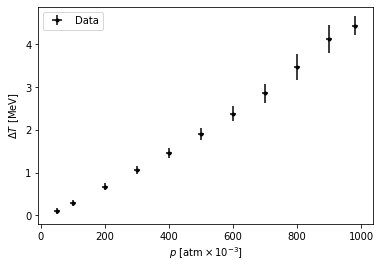

In [4]:
# Insert your code here.

import matplotlib.pyplot as plt

delta_T = T0 - T
plt.errorbar(unumpy.nominal_values(p), unumpy.nominal_values(delta_T), yerr=unumpy.std_devs(delta_T), xerr=unumpy.std_devs(p),
             marker='o', markersize=3, color='black', linestyle='None', label='Data')
plt.xlabel(r'$p$ [$\mathrm{atm} \times 10^{-3}$]')
plt.ylabel(r'$\Delta T$ [MeV]')
plt.legend(loc='upper left')
plt.show()

$\color{red}{\textbf{Task:}}$ calculate the specific ionization losses $f(T)$ and its uncertainty.

- Use the numerical derivative to calculate the specific ionization losses.
- The relation between the equivalent path length at atmospheric pressure, $x$, and the pressure, $p$, is given by:
  $$
  x = \frac{p}{p_0} x_0
  $$
  - $x_0$ is the distance between the radioactive source and the detector, and $p_0$ stands for the atmospheric pressure.
- The numerical derivative is calculated as:
  $$
  f(T) = - \frac{\mathrm{d} T}{\mathrm{d} x}\Big|_{\frac{x_i + x_{i+1}}{2}} \approx - \frac{T_{i} - T_{i+1}}{p_{i} - p_{i+1}}\frac{p_0}{x_0},
  $$
  where $i$ is the index of the pressure value, and $T_i$ is the measured kinetic energy of the alpha particles at the pressure $p_i$.

In [15]:
# Insert your code here.

# The distance source-detector has been used already.
x_0 = l

# The last value of the pressure array is the atmospheric pressure
p_0 = p[-1]

# Arrays needed for the numerical derivative.
p_i1 = p[1:]
p_i = p[:-1]
T_i1 = T[1:]
T_i = T[:-1]
x_i1 = p_i1 * x_0 / p_0
x_i  = p_i  * x_0 / p_0

# Numerical derivative.
fT = -(T_i - T_i1) / (p_i - p_i1) * p_0 / x_0

# Print the values in a table.
headers = ['p [atm/1000]', 'T [MeV]', 'fT [MeV/mm]']
print(pd.DataFrame(np.stack([(p_i + p_i1)/2, (T_i + T_i1)/2, fT], axis=-1), columns=headers))

  p [atm/1000]      T [MeV]    fT [MeV/mm]
0       75+/-7  5.29+/-0.05    0.08+/-0.05
1      150+/-7  5.01+/-0.05  0.085+/-0.027
2      250+/-7  4.62+/-0.06  0.089+/-0.030
3      350+/-7  4.22+/-0.07  0.087+/-0.034
4      450+/-7  3.81+/-0.09    0.10+/-0.04
5      550+/-7  3.34+/-0.11    0.10+/-0.05
6      650+/-7  2.87+/-0.14    0.11+/-0.07
7      750+/-7  2.33+/-0.19    0.14+/-0.09
8      850+/-7  1.69+/-0.22    0.15+/-0.10
9      940+/-7  1.21+/-0.20    0.09+/-0.11


$\color{red}{\textbf{Task:}}$ plot the specific ionization losses $f(T)$ as a function of the kinetic energy of the alpha particles $T$.

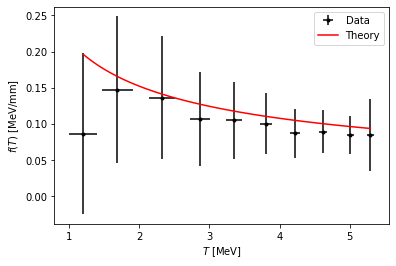

In [6]:
# Insert your code here.

# The specific ionization losses.
T_points = (T_i + T_i1) / 2.
plt.errorbar(unumpy.nominal_values(T_points), unumpy.nominal_values(fT), yerr=unumpy.std_devs(fT), xerr=unumpy.std_devs(T_points),
                marker='o', markersize=3, color='black', linestyle='None', label='Data')

# The Bethe-Bloch formula approximation.
T_points_fine = np.linspace(T_points[0].nominal_value, T_points[-1].nominal_value, 100)
fT_fine = 2. / 3. / (0.31 * 10) / np.sqrt(T_points_fine)
plt.plot(T_points_fine, fT_fine, color='red', label='Theory')

# Axes labels.
plt.xlabel(r'$T$ [MeV]')
plt.ylabel(r'$f(T)$ [MeV/mm]')

# get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[::-1], labels=labels[::-1])

plt.show()

# Assignment 3
- There is a plutonium sample containing the isotopes $^{238}\mathrm{Pu}$ and $^{239}\mathrm{Pu}$.
- Measure the energies of the alpha particles emitted from the sample and compare them with tabulated values.
- Determine the relative abundance of the isotope $^{238}\mathrm{Pu}$ in the sample with an accuracy better than 10\%.
  - The half-lives of the isotopes are $T_{1/2}(^{238}\text{Pu}) = 87.71$ yr and $T_{1/2}(^{239}\text{Pu}) = 24.13 \cdot 10^3$ yr.
  - You need to measure activities of the two isotopes composing the sample.

$\color{red}{\textbf{Task:}}$ derive the formula for the fraction of the isotope $^{238}\mathrm{Pu}$ atoms in the sample.
 - Express the fraction as a function of the isotope activities, $A_{238}$ and $A_{239}$, and the isotope half-lives.

$\color{red}{\textbf{Solution:}}$

- The activity of the isotopes $^{238}\mathrm{Pu}$ and $^{239}\mathrm{Pu}$ are given by:
  $$
  \begin{align*}
  A_{238} &= \frac{N_{238}}{T_{1/2}^{238} \ln(2)} = \frac{f_{238}N_\mathrm{tot}}{T_{1/2}^{238} \ln(2)} \\
  A_{239} &= \frac{N_{239}}{T_{1/2}^{239} \ln(2)} = \frac{(1-f_{238})N_\mathrm{tot}}{T_{1/2}^{239} \ln(2)} \\
  \end{align*}
  $$
  - $N_{238}$ and $N_{239}$ are the number of atoms of the isotopes $^{238}\mathrm{Pu}$ and $^{239}\mathrm{Pu}$, respectively.
  - $N_\mathrm{tot}$ is the total number of atoms in the sample.
  - $f_{238}$ is the fraction of the isotope $^{238}\mathrm{Pu}$ atoms in the sample.
  - In the second equation, $(1-f_{238})$ is the fraction of the isotope $^{239}\mathrm{Pu}$ atoms in the sample.
- Dividing the two equations, and rearranging the terms, we get:
  $$
  f_{238} = \frac{A_{238}}{A_{238} + A_{239} \frac{T_{1/2}^{239}}{T_{1/2}^{238}}}
  $$


$\color{red}{\textbf{Task:}}$ calculate the fraction of the isotope $^{238}\mathrm{Pu}$ atoms in the sample, given the activities $A_{238}$ and $A_{239}$.

In [7]:
# Insert your code here.

dN_238, dN_239 = 1034, 104304
dN_238 = ufloat(dN_238, np.sqrt(dN_238))
dN_239 = ufloat(dN_239, np.sqrt(dN_239))
dt = ufloat(319, 0)
T_238 = ufloat(87.71, 0)
T_239 = ufloat(24130, 0)

# The activity of the sources.
A_238 = dN_238 / dt
A_239 = dN_239 / dt

# The fraction of the 238Pu.
f_238 = A_238 / (A_238 + A_239 * T_239 / T_238)
print(f_238)

(3.60+/-0.11)e-05
